In [ ]:
import marimo as mo
import pandas as pd
from czitools.metadata_tools import czi_metadata as czimd
from czitools.utils import misc
from czitools.read_tools import read_tools as czird
import dask.array as da
from pathlib import Path
import os
import glob
from matplotlib import pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import LinearSegmentedColormap

In [ ]:
file_browser = mo.ui.file_browser(multiple=False, filetypes=[".czi"], restrict_navigation=False, initial_path="F:\\Testdata_Zeiss\\")

# Display the file browser
mo.vstack([file_browser])

In [ ]:
filepath = str(file_browser.path(0))
print(f"Filepath: {filepath}")

Filepath: F:\Testdata_Zeiss\LLS7\LS_Mitosis_T=150-300_ZSTD.czi


In [ ]:
def hex_to_rgb(hex_color: str) -> tuple[int, int, int]:
    """
    Convert a hexadecimal color string to an RGB tuple.
    Args:
        hex_color (str): A string representing a color in hexadecimal format (e.g., "#RRGGBB").
    Returns:
        tuple[int, int, int]: A tuple containing the RGB values as floats in the range [0, 1].
    """

    hex_color = hex_color.lstrip("#")
    rgb = tuple(int(hex_color[i : i + 2], 16) / 255.0 for i in (0, 2, 4))

    return rgb

# get 6d array with dimension order STCZYX(A)
array6d, mdata = czird.read_6darray(filepath, use_dask=False, chunk_zyx=True)

# show dask array structure
if isinstance(array6d, da.Array):
    print(array6d)
else:
    print("Shape:", array6d.shape, "dtype:", array6d.dtype)

# get array dimensions
dims = array6d.shape[:-2]
dims_names = ["S", "T", "C", "Z"]

cmaps = []

for ch in range(mdata.image.SizeC):
    chname = mdata.channelinfo.names[ch]
    rgb = hex_to_rgb(mdata.channelinfo.colors[ch][3:])
    cmaps.append(LinearSegmentedColormap.from_list(chname, [(0, 0, 0), rgb]))

Reading sublocks planes: 1 2Dplanes [00:00, 166.22 2Dplanes/s]
Reading 2D planes: 0 2Dplanes [00:00, ? 2Dplanes/s]

Reading 2D planes: 58 2Dplanes [00:00, 576.34 2Dplanes/s]

Reading 2D planes: 116 2Dplanes [00:00, 570.04 2Dplanes/s]

Reading 2D planes: 186 2Dplanes [00:00, 628.68 2Dplanes/s]

Reading 2D planes: 254 2Dplanes [00:00, 647.97 2Dplanes/s]

Reading 2D planes: 325 2Dplanes [00:00, 668.05 2Dplanes/s]

Reading 2D planes: 392 2Dplanes [00:00, 661.96 2Dplanes/s]

Reading 2D planes: 460 2Dplanes [00:00, 664.73 2Dplanes/s]

Reading 2D planes: 527 2Dplanes [00:00, 655.84 2Dplanes/s]

Reading 2D planes: 600 2Dplanes [00:00, 676.34 2Dplanes/s]

Reading 2D planes: 671 2Dplanes [00:01, 685.21 2Dplanes/s]

Reading 2D planes: 745 2Dplanes [00:01, 698.95 2Dplanes/s]

Reading 2D planes: 817 2Dplanes [00:01, 702.58 2Dplanes/s]

Reading 2D planes: 889 2Dplanes [00:01, 707.73 2Dplanes/s]

Reading 2D planes: 960 2Dplanes [00:01, 698.88 2Dplanes/s]

Reading 2D planes: 1030 2Dplanes [00:01, 684.63 2Dplanes/s]

Reading 2D planes: 1100 2Dplanes [00:01, 685.40 2Dplanes/s]

Reading 2D planes: 1169 2Dplanes [00:01, 681.35 2Dplanes/s]

Reading 2D planes: 1238 2Dplanes [00:01, 659.07 2Dplanes/s]

Reading 2D planes: 1311 2Dplanes [00:01, 677.99 2Dplanes/s]

Reading 2D planes: 1379 2Dplanes [00:02, 657.90 2Dplanes/s]

Reading 2D planes: 1445 2Dplanes [00:02, 642.32 2Dplanes/s]

Reading 2D planes: 1514 2Dplanes [00:02, 654.51 2Dplanes/s]

Reading 2D planes: 1584 2Dplanes [00:02, 666.84 2Dplanes/s]

Reading 2D planes: 1653 2Dplanes [00:02, 671.90 2Dplanes/s]

Reading 2D planes: 1721 2Dplanes [00:02, 674.20 2Dplanes/s]

Reading 2D planes: 1790 2Dplanes [00:02, 677.15 2Dplanes/s]

Reading 2D planes: 1858 2Dplanes [00:02, 661.33 2Dplanes/s]

Reading 2D planes: 1925 2Dplanes [00:02, 643.07 2Dplanes/s]

Reading 2D planes: 1994 2Dplanes [00:02, 656.54 2Dplanes/s]

Reading 2D planes: 2064 2Dplanes [00:03, 668.31 2Dplanes/s]

Reading 2D planes: 2137 2Dplanes [00:03, 684.55 2Dplanes/s]

Reading 2D planes: 2207 2Dplanes [00:03, 687.00 2Dplanes/s]

Reading 2D planes: 2278 2Dplanes [00:03, 693.35 2Dplanes/s]

Reading 2D planes: 2348 2Dplanes [00:03, 682.63 2Dplanes/s]

Reading 2D planes: 2421 2Dplanes [00:03, 694.34 2Dplanes/s]

Reading 2D planes: 2491 2Dplanes [00:03, 690.63 2Dplanes/s]

Reading 2D planes: 2561 2Dplanes [00:03, 691.22 2Dplanes/s]

Reading 2D planes: 2631 2Dplanes [00:03, 674.37 2Dplanes/s]

Reading 2D planes: 2699 2Dplanes [00:04, 654.48 2Dplanes/s]

Reading 2D planes: 2765 2Dplanes [00:04, 621.24 2Dplanes/s]

Reading 2D planes: 2828 2Dplanes [00:04, 610.06 2Dplanes/s]

Reading 2D planes: 2890 2Dplanes [00:04, 610.75 2Dplanes/s]

Reading 2D planes: 2952 2Dplanes [00:04, 555.85 2Dplanes/s]

Reading 2D planes: 3009 2Dplanes [00:04, 495.92 2Dplanes/s]

Reading 2D planes: 3061 2Dplanes [00:04, 486.35 2Dplanes/s]

Reading 2D planes: 3127 2Dplanes [00:04, 529.79 2Dplanes/s]

Reading 2D planes: 3184 2Dplanes [00:04, 539.82 2Dplanes/s]

Reading 2D planes: 3240 2Dplanes [00:05, 539.57 2Dplanes/s]

Reading 2D planes: 3302 2Dplanes [00:05, 562.26 2Dplanes/s]

Reading 2D planes: 3359 2Dplanes [00:05, 536.59 2Dplanes/s]

Reading 2D planes: 3422 2Dplanes [00:05, 560.04 2Dplanes/s]

Reading 2D planes: 3484 2Dplanes [00:05, 576.10 2Dplanes/s]

Reading 2D planes: 3543 2Dplanes [00:05, 579.96 2Dplanes/s]

Reading 2D planes: 3604 2Dplanes [00:05, 587.20 2Dplanes/s]

Reading 2D planes: 3666 2Dplanes [00:05, 596.72 2Dplanes/s]

Reading 2D planes: 3726 2Dplanes [00:05, 593.88 2Dplanes/s]

Reading 2D planes: 3786 2Dplanes [00:05, 578.10 2Dplanes/s]

Reading 2D planes: 3844 2Dplanes [00:06, 560.97 2Dplanes/s]

Reading 2D planes: 3901 2Dplanes [00:06, 553.27 2Dplanes/s]

Reading 2D planes: 3959 2Dplanes [00:06, 560.12 2Dplanes/s]

Reading 2D planes: 4016 2Dplanes [00:06, 561.68 2Dplanes/s]

Reading 2D planes: 4073 2Dplanes [00:06, 563.81 2Dplanes/s]

Reading 2D planes: 4131 2Dplanes [00:06, 568.22 2Dplanes/s]

Reading 2D planes: 4188 2Dplanes [00:06, 476.89 2Dplanes/s]

Reading 2D planes: 4246 2Dplanes [00:06, 503.23 2Dplanes/s]

Reading 2D planes: 4303 2Dplanes [00:06, 520.77 2Dplanes/s]

Reading 2D planes: 4365 2Dplanes [00:07, 546.22 2Dplanes/s]

Reading 2D planes: 4429 2Dplanes [00:07, 571.34 2Dplanes/s]

Reading 2D planes: 4491 2Dplanes [00:07, 585.16 2Dplanes/s]

Reading 2D planes: 4560 2Dplanes [00:07, 613.71 2Dplanes/s]

Reading 2D planes: 4623 2Dplanes [00:07, 616.79 2Dplanes/s]

Reading 2D planes: 4688 2Dplanes [00:07, 624.25 2Dplanes/s]

Reading 2D planes: 4751 2Dplanes [00:07, 614.50 2Dplanes/s]

Reading 2D planes: 4813 2Dplanes [00:07, 614.62 2Dplanes/s]

Reading 2D planes: 4875 2Dplanes [00:07, 609.66 2Dplanes/s]

Reading 2D planes: 4937 2Dplanes [00:08, 591.71 2Dplanes/s]

Reading 2D planes: 4997 2Dplanes [00:08, 582.33 2Dplanes/s]

Reading 2D planes: 5057 2Dplanes [00:08, 585.46 2Dplanes/s]

Reading 2D planes: 5123 2Dplanes [00:08, 605.50 2Dplanes/s]

Reading 2D planes: 5184 2Dplanes [00:08, 597.66 2Dplanes/s]

Reading 2D planes: 5244 2Dplanes [00:08, 571.36 2Dplanes/s]

Reading 2D planes: 5312 2Dplanes [00:08, 600.82 2Dplanes/s]

Reading 2D planes: 5378 2Dplanes [00:08, 615.92 2Dplanes/s]

Reading 2D planes: 5440 2Dplanes [00:08, 613.24 2Dplanes/s]

Reading 2D planes: 5505 2Dplanes [00:08, 621.82 2Dplanes/s]

Reading 2D planes: 5568 2Dplanes [00:09, 602.62 2Dplanes/s]

Reading 2D planes: 5629 2Dplanes [00:09, 603.57 2Dplanes/s]

Reading 2D planes: 5694 2Dplanes [00:09, 614.77 2Dplanes/s]

Reading 2D planes: 5759 2Dplanes [00:09, 622.67 2Dplanes/s]

Reading 2D planes: 5824 2Dplanes [00:09, 627.32 2Dplanes/s]

Reading 2D planes: 5887 2Dplanes [00:09, 619.98 2Dplanes/s]

Reading 2D planes: 5953 2Dplanes [00:09, 631.72 2Dplanes/s]

Reading 2D planes: 6017 2Dplanes [00:09, 618.27 2Dplanes/s]

Reading 2D planes: 6079 2Dplanes [00:09, 613.91 2Dplanes/s]

Reading 2D planes: 6143 2Dplanes [00:09, 620.68 2Dplanes/s]

Reading 2D planes: 6206 2Dplanes [00:10, 616.00 2Dplanes/s]

Reading 2D planes: 6270 2Dplanes [00:10, 620.00 2Dplanes/s]

Reading 2D planes: 6334 2Dplanes [00:10, 623.99 2Dplanes/s]

Reading 2D planes: 6400 2Dplanes [00:10, 632.58 2Dplanes/s]

Reading 2D planes: 6464 2Dplanes [00:10, 600.73 2Dplanes/s]

Reading 2D planes: 6527 2Dplanes [00:10, 609.05 2Dplanes/s]

Reading 2D planes: 6589 2Dplanes [00:10, 610.91 2Dplanes/s]

Reading 2D planes: 6651 2Dplanes [00:10, 607.96 2Dplanes/s]

Reading 2D planes: 6720 2Dplanes [00:10, 630.37 2Dplanes/s]

Reading 2D planes: 6784 2Dplanes [00:11, 629.44 2Dplanes/s]

Reading 2D planes: 6848 2Dplanes [00:11, 615.37 2Dplanes/s]

Reading 2D planes: 6912 2Dplanes [00:11, 620.06 2Dplanes/s]

Reading 2D planes: 6975 2Dplanes [00:11, 617.69 2Dplanes/s]

Reading 2D planes: 7038 2Dplanes [00:11, 619.72 2Dplanes/s]

Reading 2D planes: 7101 2Dplanes [00:11, 614.94 2Dplanes/s]

Reading 2D planes: 7163 2Dplanes [00:11, 611.42 2Dplanes/s]

Reading 2D planes: 7225 2Dplanes [00:11, 612.42 2Dplanes/s]

Reading 2D planes: 7287 2Dplanes [00:11, 605.47 2Dplanes/s]

Reading 2D planes: 7352 2Dplanes [00:11, 616.36 2Dplanes/s]

Reading 2D planes: 7414 2Dplanes [00:12, 609.07 2Dplanes/s]

Reading 2D planes: 7476 2Dplanes [00:12, 611.26 2Dplanes/s]

Reading 2D planes: 7538 2Dplanes [00:12, 602.76 2Dplanes/s]

Reading 2D planes: 7599 2Dplanes [00:12, 602.95 2Dplanes/s]

Reading 2D planes: 7661 2Dplanes [00:12, 603.08 2Dplanes/s]

Reading 2D planes: 7722 2Dplanes [00:12, 602.83 2Dplanes/s]

Reading 2D planes: 7784 2Dplanes [00:12, 607.37 2Dplanes/s]

Reading 2D planes: 7845 2Dplanes [00:12, 604.24 2Dplanes/s]

Reading 2D planes: 7908 2Dplanes [00:12, 609.75 2Dplanes/s]

Reading 2D planes: 7969 2Dplanes [00:12, 603.12 2Dplanes/s]

Reading 2D planes: 8030 2Dplanes [00:13, 604.89 2Dplanes/s]

Reading 2D planes: 8094 2Dplanes [00:13, 611.78 2Dplanes/s]

Reading 2D planes: 8156 2Dplanes [00:13, 609.96 2Dplanes/s]

Reading 2D planes: 8218 2Dplanes [00:13, 599.65 2Dplanes/s]

Reading 2D planes: 8279 2Dplanes [00:13, 602.26 2Dplanes/s]

Reading 2D planes: 8340 2Dplanes [00:13, 603.90 2Dplanes/s]

Reading 2D planes: 8401 2Dplanes [00:13, 600.16 2Dplanes/s]

Reading 2D planes: 8471 2Dplanes [00:13, 628.07 2Dplanes/s]

Reading 2D planes: 8535 2Dplanes [00:13, 629.32 2Dplanes/s]

Reading 2D planes: 8603 2Dplanes [00:13, 643.62 2Dplanes/s]

Reading 2D planes: 8668 2Dplanes [00:14, 625.93 2Dplanes/s]

Reading 2D planes: 8731 2Dplanes [00:14, 618.03 2Dplanes/s]

Reading 2D planes: 8801 2Dplanes [00:14, 640.63 2Dplanes/s]

Reading 2D planes: 8866 2Dplanes [00:14, 638.02 2Dplanes/s]

Reading 2D planes: 8930 2Dplanes [00:14, 632.37 2Dplanes/s]

Reading 2D planes: 8994 2Dplanes [00:14, 631.09 2Dplanes/s]

Reading 2D planes: 9065 2Dplanes [00:14, 653.54 2Dplanes/s]

Reading 2D planes: 9131 2Dplanes [00:14, 649.55 2Dplanes/s]

Reading 2D planes: 9197 2Dplanes [00:14, 622.55 2Dplanes/s]

Reading 2D planes: 9260 2Dplanes [00:15, 617.55 2Dplanes/s]

Reading 2D planes: 9330 2Dplanes [00:15, 640.45 2Dplanes/s]

Reading 2D planes: 9396 2Dplanes [00:15, 645.41 2Dplanes/s]

Reading 2D planes: 9467 2Dplanes [00:15, 663.36 2Dplanes/s]

Reading 2D planes: 9534 2Dplanes [00:15, 634.18 2Dplanes/s]

Reading 2D planes: 9598 2Dplanes [00:15, 594.25 2Dplanes/s]

Reading 2D planes: 9664 2Dplanes [00:15, 610.89 2Dplanes/s]

Reading 2D planes: 9732 2Dplanes [00:15, 628.98 2Dplanes/s]

Reading 2D planes: 9801 2Dplanes [00:15, 645.92 2Dplanes/s]

Reading 2D planes: 9874 2Dplanes [00:15, 668.99 2Dplanes/s]

Reading 2D planes: 9942 2Dplanes [00:16, 641.77 2Dplanes/s]

Reading 2D planes: 10009 2Dplanes [00:16, 647.15 2Dplanes/s]

Reading 2D planes: 10082 2Dplanes [00:16, 669.53 2Dplanes/s]

Reading 2D planes: 10153 2Dplanes [00:16, 681.29 2Dplanes/s]

Reading 2D planes: 10222 2Dplanes [00:16, 664.50 2Dplanes/s]

Reading 2D planes: 10293 2Dplanes [00:16, 676.26 2Dplanes/s]

Reading 2D planes: 10361 2Dplanes [00:16, 661.90 2Dplanes/s]

Reading 2D planes: 10428 2Dplanes [00:16, 656.09 2Dplanes/s]

Reading 2D planes: 10494 2Dplanes [00:16, 655.44 2Dplanes/s]

Reading 2D planes: 10560 2Dplanes [00:17, 653.19 2Dplanes/s]

Reading 2D planes: 10626 2Dplanes [00:17, 652.91 2Dplanes/s]

Reading 2D planes: 10697 2Dplanes [00:17, 667.73 2Dplanes/s]

Reading 2D planes: 10769 2Dplanes [00:17, 679.98 2Dplanes/s]

Reading 2D planes: 10838 2Dplanes [00:17, 679.74 2Dplanes/s]

Reading 2D planes: 10907 2Dplanes [00:17, 679.77 2Dplanes/s]

Reading 2D planes: 10980 2Dplanes [00:17, 692.16 2Dplanes/s]

Reading 2D planes: 11050 2Dplanes [00:17, 663.90 2Dplanes/s]

Reading 2D planes: 11117 2Dplanes [00:17, 653.90 2Dplanes/s]

Reading 2D planes: 11187 2Dplanes [00:17, 665.24 2Dplanes/s]

Reading 2D planes: 11254 2Dplanes [00:18, 647.75 2Dplanes/s]

Reading 2D planes: 11319 2Dplanes [00:18, 638.71 2Dplanes/s]

Reading 2D planes: 11389 2Dplanes [00:18, 655.44 2Dplanes/s]

Reading 2D planes: 11458 2Dplanes [00:18, 664.38 2Dplanes/s]

Reading 2D planes: 11526 2Dplanes [00:18, 667.18 2Dplanes/s]

Reading 2D planes: 11595 2Dplanes [00:18, 672.65 2Dplanes/s]

Reading 2D planes: 11665 2Dplanes [00:18, 679.96 2Dplanes/s]

Reading 2D planes: 11734 2Dplanes [00:18, 670.51 2Dplanes/s]

Reading 2D planes: 11809 2Dplanes [00:18, 693.70 2Dplanes/s]

Reading 2D planes: 11879 2Dplanes [00:18, 681.33 2Dplanes/s]

Reading 2D planes: 11948 2Dplanes [00:19, 675.53 2Dplanes/s]

Reading 2D planes: 12018 2Dplanes [00:19, 681.61 2Dplanes/s]

Reading 2D planes: 12088 2Dplanes [00:19, 684.30 2Dplanes/s]

Reading 2D planes: 12159 2Dplanes [00:19, 688.73 2Dplanes/s]

Reading 2D planes: 12228 2Dplanes [00:19, 688.20 2Dplanes/s]

Reading 2D planes: 12297 2Dplanes [00:19, 678.20 2Dplanes/s]

Reading 2D planes: 12370 2Dplanes [00:19, 691.80 2Dplanes/s]

Reading 2D planes: 12441 2Dplanes [00:19, 696.35 2Dplanes/s]

Reading 2D planes: 12511 2Dplanes [00:19, 692.11 2Dplanes/s]

Reading 2D planes: 12581 2Dplanes [00:20, 659.10 2Dplanes/s]

Reading 2D planes: 12648 2Dplanes [00:20, 638.51 2Dplanes/s]

Reading 2D planes: 12713 2Dplanes [00:20, 613.76 2Dplanes/s]

Reading 2D planes: 12786 2Dplanes [00:20, 644.50 2Dplanes/s]

Reading 2D planes: 12851 2Dplanes [00:20, 642.35 2Dplanes/s]

Reading 2D planes: 12916 2Dplanes [00:20, 631.41 2Dplanes/s]

Reading 2D planes: 12989 2Dplanes [00:20, 657.61 2Dplanes/s]

Reading 2D planes: 13056 2Dplanes [00:20, 658.34 2Dplanes/s]

Reading 2D planes: 13125 2Dplanes [00:20, 665.56 2Dplanes/s]

Reading 2D planes: 13197 2Dplanes [00:20, 680.07 2Dplanes/s]

Reading 2D planes: 13267 2Dplanes [00:21, 684.04 2Dplanes/s]

Reading 2D planes: 13336 2Dplanes [00:21, 676.45 2Dplanes/s]

Reading 2D planes: 13404 2Dplanes [00:21, 669.03 2Dplanes/s]

Reading 2D planes: 13474 2Dplanes [00:21, 673.84 2Dplanes/s]

Reading 2D planes: 13542 2Dplanes [00:21, 666.54 2Dplanes/s]

Reading 2D planes: 13609 2Dplanes [00:21, 656.68 2Dplanes/s]

Reading 2D planes: 13681 2Dplanes [00:21, 672.93 2Dplanes/s]

Reading 2D planes: 13754 2Dplanes [00:21, 688.16 2Dplanes/s]

Reading 2D planes: 13823 2Dplanes [00:21, 688.35 2Dplanes/s]

Reading 2D planes: 13896 2Dplanes [00:21, 699.22 2Dplanes/s]

Reading 2D planes: 13966 2Dplanes [00:22, 656.07 2Dplanes/s]

Reading 2D planes: 14033 2Dplanes [00:22, 647.79 2Dplanes/s]

Reading 2D planes: 14105 2Dplanes [00:22, 666.18 2Dplanes/s]

Reading 2D planes: 14173 2Dplanes [00:22, 667.40 2Dplanes/s]

Reading 2D planes: 14243 2Dplanes [00:22, 673.13 2Dplanes/s]

Reading 2D planes: 14320 2Dplanes [00:22, 698.17 2Dplanes/s]

Reading 2D planes: 14393 2Dplanes [00:22, 704.60 2Dplanes/s]

Reading 2D planes: 14464 2Dplanes [00:22, 690.57 2Dplanes/s]

Reading 2D planes: 14534 2Dplanes [00:22, 690.88 2Dplanes/s]

Reading 2D planes: 14604 2Dplanes [00:23, 690.43 2Dplanes/s]

Reading 2D planes: 14677 2Dplanes [00:23, 701.35 2Dplanes/s]

Reading 2D planes: 14751 2Dplanes [00:23, 711.77 2Dplanes/s]

Reading 2D planes: 14823 2Dplanes [00:23, 708.48 2Dplanes/s]

Reading 2D planes: 14896 2Dplanes [00:23, 711.20 2Dplanes/s]

Reading 2D planes: 14968 2Dplanes [00:23, 689.36 2Dplanes/s]

Reading 2D planes: 15038 2Dplanes [00:23, 675.26 2Dplanes/s]

Reading 2D planes: 15106 2Dplanes [00:23, 657.54 2Dplanes/s]

Reading 2D planes: 15176 2Dplanes [00:23, 668.23 2Dplanes/s]

Reading 2D planes: 15246 2Dplanes [00:23, 675.76 2Dplanes/s]

Reading 2D planes: 15314 2Dplanes [00:24, 641.43 2Dplanes/s]

Reading 2D planes: 15379 2Dplanes [00:24, 609.08 2Dplanes/s]

Reading 2D planes: 15443 2Dplanes [00:24, 616.26 2Dplanes/s]

Reading 2D planes: 15506 2Dplanes [00:24, 615.66 2Dplanes/s]

Reading 2D planes: 15568 2Dplanes [00:24, 612.97 2Dplanes/s]

Reading 2D planes: 15638 2Dplanes [00:24, 632.68 2Dplanes/s]

Reading 2D planes: 15705 2Dplanes [00:24, 641.32 2Dplanes/s]

Reading 2D planes: 15770 2Dplanes [00:24, 633.56 2Dplanes/s]

Reading 2D planes: 15834 2Dplanes [00:24, 632.93 2Dplanes/s]

Reading 2D planes: 15898 2Dplanes [00:25, 630.59 2Dplanes/s]

Reading 2D planes: 15962 2Dplanes [00:25, 617.81 2Dplanes/s]

Reading 2D planes: 16028 2Dplanes [00:25, 628.49 2Dplanes/s]

Reading 2D planes: 16092 2Dplanes [00:25, 631.31 2Dplanes/s]

Reading 2D planes: 16156 2Dplanes [00:25, 579.72 2Dplanes/s]

Reading 2D planes: 16225 2Dplanes [00:25, 609.46 2Dplanes/s]

Reading 2D planes: 16297 2Dplanes [00:25, 640.09 2Dplanes/s]

Reading 2D planes: 16369 2Dplanes [00:25, 660.80 2Dplanes/s]

Reading 2D planes: 16440 2Dplanes [00:25, 675.04 2Dplanes/s]

Reading 2D planes: 16511 2Dplanes [00:25, 682.80 2Dplanes/s]

Reading 2D planes: 16580 2Dplanes [00:26, 680.32 2Dplanes/s]

Reading 2D planes: 16649 2Dplanes [00:26, 637.76 2Dplanes/s]

Reading 2D planes: 16715 2Dplanes [00:26, 642.78 2Dplanes/s]

Reading 2D planes: 16788 2Dplanes [00:26, 666.74 2Dplanes/s]

Reading 2D planes: 16856 2Dplanes [00:26, 659.03 2Dplanes/s]

Reading 2D planes: 16923 2Dplanes [00:26, 656.52 2Dplanes/s]

Reading 2D planes: 16995 2Dplanes [00:26, 672.72 2Dplanes/s]

Reading 2D planes: 17063 2Dplanes [00:26, 653.89 2Dplanes/s]

Reading 2D planes: 17133 2Dplanes [00:26, 666.19 2Dplanes/s]

Reading 2D planes: 17205 2Dplanes [00:27, 680.12 2Dplanes/s]

Reading 2D planes: 17280 2Dplanes [00:27, 696.84 2Dplanes/s]

Reading 2D planes: 17350 2Dplanes [00:27, 688.51 2Dplanes/s]

Reading 2D planes: 17419 2Dplanes [00:27, 662.24 2Dplanes/s]

Reading 2D planes: 17490 2Dplanes [00:27, 674.85 2Dplanes/s]

Reading 2D planes: 17558 2Dplanes [00:27, 671.71 2Dplanes/s]

Reading 2D planes: 17626 2Dplanes [00:27, 654.86 2Dplanes/s]

Reading 2D planes: 17692 2Dplanes [00:27, 652.31 2Dplanes/s]

Reading 2D planes: 17761 2Dplanes [00:27, 660.20 2Dplanes/s]

Reading 2D planes: 17835 2Dplanes [00:27, 683.39 2Dplanes/s]

Reading 2D planes: 17904 2Dplanes [00:28, 665.11 2Dplanes/s]

Reading 2D planes: 17971 2Dplanes [00:28, 661.24 2Dplanes/s]

Reading 2D planes: 18038 2Dplanes [00:28, 661.24 2Dplanes/s]

Reading 2D planes: 18107 2Dplanes [00:28, 666.04 2Dplanes/s]

Reading 2D planes: 18175 2Dplanes [00:28, 665.66 2Dplanes/s]

Reading 2D planes: 18246 2Dplanes [00:28, 675.28 2Dplanes/s]

Reading 2D planes: 18314 2Dplanes [00:28, 652.70 2Dplanes/s]

Reading 2D planes: 18383 2Dplanes [00:28, 660.65 2Dplanes/s]

Reading 2D planes: 18451 2Dplanes [00:28, 662.75 2Dplanes/s]

Reading 2D planes: 18521 2Dplanes [00:28, 672.41 2Dplanes/s]

Reading 2D planes: 18589 2Dplanes [00:29, 653.17 2Dplanes/s]

Reading 2D planes: 18657 2Dplanes [00:29, 659.93 2Dplanes/s]

Reading 2D planes: 18726 2Dplanes [00:29, 666.66 2Dplanes/s]

Reading 2D planes: 18793 2Dplanes [00:29, 646.39 2Dplanes/s]

Reading 2D planes: 18859 2Dplanes [00:29, 649.01 2Dplanes/s]

Reading 2D planes: 18925 2Dplanes [00:29, 639.01 2Dplanes/s]

Reading 2D planes: 18990 2Dplanes [00:29, 622.29 2Dplanes/s]

Reading 2D planes: 19064 2Dplanes [00:29, 654.65 2Dplanes/s]

Reading 2D planes: 19137 2Dplanes [00:29, 674.62 2Dplanes/s]

Reading 2D planes: 19205 2Dplanes [00:30, 640.36 2Dplanes/s]

Reading 2D planes: 19270 2Dplanes [00:30, 634.76 2Dplanes/s]

Reading 2D planes: 19339 2Dplanes [00:30, 648.81 2Dplanes/s]

Reading 2D planes: 19405 2Dplanes [00:30, 636.73 2Dplanes/s]

Reading 2D planes: 19469 2Dplanes [00:30, 635.24 2Dplanes/s]

Reading 2D planes: 19543 2Dplanes [00:30, 661.79 2Dplanes/s]

Reading 2D planes: 19610 2Dplanes [00:30, 653.23 2Dplanes/s]

Reading 2D planes: 19677 2Dplanes [00:30, 656.60 2Dplanes/s]

Reading 2D planes: 19743 2Dplanes [00:30, 636.37 2Dplanes/s]

Reading 2D planes: 19814 2Dplanes [00:30, 656.81 2Dplanes/s]

Reading 2D planes: 19880 2Dplanes [00:31, 639.45 2Dplanes/s]

Reading 2D planes: 19949 2Dplanes [00:31, 653.87 2Dplanes/s]

Reading 2D planes: 20015 2Dplanes [00:31, 647.85 2Dplanes/s]

Reading 2D planes: 20082 2Dplanes [00:31, 652.87 2Dplanes/s]

Reading 2D planes: 20148 2Dplanes [00:31, 640.44 2Dplanes/s]

Reading 2D planes: 20222 2Dplanes [00:31, 667.12 2Dplanes/s]

Reading 2D planes: 20289 2Dplanes [00:31, 660.68 2Dplanes/s]

Reading 2D planes: 20356 2Dplanes [00:31, 657.15 2Dplanes/s]

Reading 2D planes: 20429 2Dplanes [00:31, 676.68 2Dplanes/s]

Reading 2D planes: 20497 2Dplanes [00:32, 672.58 2Dplanes/s]

Reading 2D planes: 20565 2Dplanes [00:32, 650.20 2Dplanes/s]

Reading 2D planes: 20633 2Dplanes [00:32, 655.84 2Dplanes/s]

Reading 2D planes: 20701 2Dplanes [00:32, 660.44 2Dplanes/s]

Reading 2D planes: 20770 2Dplanes [00:32, 667.46 2Dplanes/s]

Reading 2D planes: 20837 2Dplanes [00:32, 666.24 2Dplanes/s]

Reading 2D planes: 20904 2Dplanes [00:32, 662.40 2Dplanes/s]

Reading 2D planes: 20971 2Dplanes [00:32, 641.74 2Dplanes/s]

Reading 2D planes: 21036 2Dplanes [00:32, 643.30 2Dplanes/s]

Reading 2D planes: 21101 2Dplanes [00:32, 643.83 2Dplanes/s]

Reading 2D planes: 21140 2Dplanes [00:33, 639.99 2Dplanes/s]


Shape: (1, 151, 2, 70, 413, 434) dtype: uint16


In [ ]:
# get the CZI metadata dictionary directly from filename
mdict = czimd.create_md_dict_red(mdata, sort=False, remove_none=True)

# convert metadata dictionary to a pandas dataframe
mdframe = misc.md2dataframe(mdict)

mo.vstack([mo.ui.table(mdframe)])

<marimo-table data-initial-value='[]' data-label='null' data-data='"./@file/275-34212-TmHCG5SI.csv"' data-total-rows='35' data-total-columns='2' data-banner-text='""' data-pagination='true' data-page-size='10' data-field-types='[["Parameter", ["string", "object"]], ["Value", ["string", "object"]]]' data-selection='"multi"' data-show-filters='true' data-show-download='true' data-show-column-summaries='true' data-row-headers='[]'>

In [ ]:
scene = mo.ui.slider(
    start=0,
    stop=dims[0] - 1,
    step=1,
    label=f"scene [0 - {dims[0]-1}]",
    show_value=True,
)

time = mo.ui.slider(
    start=0,
    stop=dims[1] - 1,
    step=1,
    label=f"time [0 - {dims[1]-1}]",
    show_value=True,
)

channel = mo.ui.slider(
    start=0,
    stop=dims[2] - 1,
    step=1,
    label=f"channel [0 - {dims[2]-1}]",
    show_value=True,
)

zplane = mo.ui.slider(
    start=0,
    stop=dims[3] - 1,
    step=1,
    label=f"zplane [0 - {dims[3]-1}]",
    show_value=True,
)

mo.vstack([scene, time, channel, zplane])

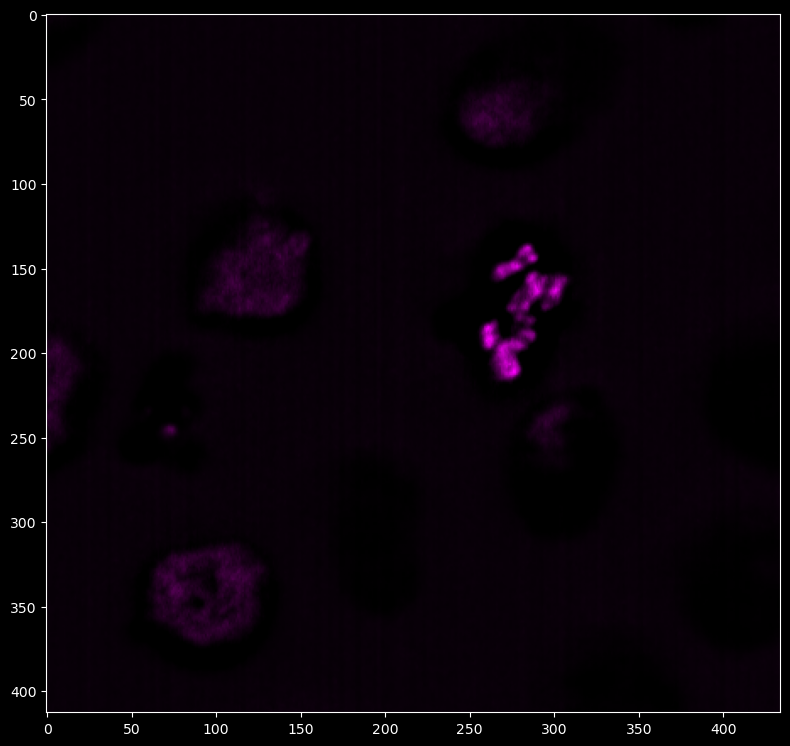

In [ ]:
show_2dplane(scene.value, time.value, channel.value, zplane.value)

In [ ]:
def show_2dplane(s, t, c, z):
    plt.figure(figsize=(8, 8))
    plt.imshow(array6d[s, t, c, z, ...], cmap=cmaps[c], vmin=None, vmax=None)
    plt.tight_layout()
    return plt.gca()